## Overall Statistics using boxplot

In [7]:
%matplotlib inline
import os
import datetime as dt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt, ticker, gridspec
from mintpy.objects import timeseries
from mintpy.utils import ptime, readfile, utils as ut, plot as pp
from mintpy import tsview
from ipynb.fs.full import utils
plt.rcParams.update({'font.size': 12})
#plt.rcParams.update({'lines.linewidth': 3.0})

work_dir = os.path.expanduser('~/Papers/2021_Geolocation/figs_src/stats_box')
os.chdir(work_dir)
print('Go to directory:', work_dir)

proj_dirs = [
    os.path.expanduser('~/data/geolocation/KyushuAlos2DT23'),
    os.path.expanduser('~/data/geolocation/ChileSenAT149'),
    os.path.expanduser('~/data/geolocation/ChileSenDT156'),
]

Go to directory: /Users/yunjunz/Papers/2021_Geolocation/figs_src/stats_box


In [71]:
# utils func
def read_data(proj_dir):
    proj_name = os.path.basename(proj_dir)
    lalo = [-21.30, -67.39] if proj_name.startswith('ChileSen') else None

    ### data files
    fnames = [
        os.path.join(proj_dir, 'mintpy_offset', 'timeseriesRg.h5'),
        os.path.join(proj_dir, 'mintpy_offset', 'timeseriesRg_gimTEC.h5'),
        os.path.join(proj_dir, 'mintpy_offset', 'timeseriesRg_gimTEC_SET.h5'),
        os.path.join(proj_dir, 'mintpy_offset', 'timeseriesRg_gimTEC_SET_ERA5.h5'),
    ]
    geom_file = os.path.join(proj_dir, 'mintpy_offset', 'inputs/geometryRadar.h5')
    mask_file = os.path.join(proj_dir, 'mintpy_offset', 'maskResInv.h5')

    # date info
    date_list = timeseries(fnames[0]).get_date_list()
    num_date = len(date_list)

    # lalo --> box
    if lalo is None:
        box = None
    else:
        atr = readfile.read_attribute(fnames[0])
        coord = ut.coordinate(atr, lookup_file=geom_file)
        y, x = coord.geo2radar(lalo[0], lalo[1])[:2]
        win = 5
        box = (x-win, y-win, x+win+1, y+win+1)

    # read data into iDict
    data_list = []
    label_list = []
    mask = readfile.read(mask_file, box=box)[0].flatten()
    for fname in fnames:
        # label
        fbase = os.path.basename(fname).replace('timeseriesRg', 'SAR').replace('.h5', '')
        label = ' - '.join(fbase.split('_'))
        label_list.append(label)
    
        # read data
        ts_data = readfile.read(fname, box=box)[0].reshape(num_date, -1)
        ts_data[:, mask==0] = np.nan
        ts_med = np.nanmedian(ts_data, axis=-1)
        ts_med -= np.nanmedian(ts_med)
        data_list.append(ts_med)

    # reverse for horizontal boxplot
    #data_list.reverse()
    #label_list.reverse()
    print('min/max: {:.1f} / {:.1f} m'.format(np.nanmin(data_list), np.nanmax(data_list)))

    return proj_name, data_list, label_list

## Read Data

In [72]:
proj_names = []
data_lists = []
label_lists = []
for proj_dir in proj_dirs:
    proj_name, data_list, label_list = read_data(proj_dir)
    proj_names.append(proj_name)
    data_lists.append(data_list)
    label_lists.append(label_list)

min/max: -2.5 / 11.1 m
min/max: -0.7 / 0.3 m
min/max: -0.5 / 0.9 m


## Plot

save figure to file /Users/yunjunz/Papers/2021_Geolocation/figs_src/stats_box/KyushuAlos2DT23v.pdf
save figure to file /Users/yunjunz/Papers/2021_Geolocation/figs_src/stats_box/ChileSenAT149v.pdf
save figure to file /Users/yunjunz/Papers/2021_Geolocation/figs_src/stats_box/ChileSenDT156v.pdf


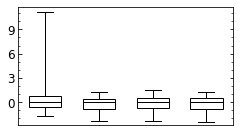

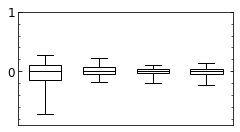

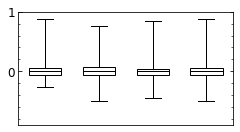

In [93]:
for i, (proj_name, data_list, label_list) in enumerate(zip(proj_names, data_lists, label_lists)):
    if proj_name.startswith('ChileSen'):
        vlim = [-0.9, 1.0];  vstep = 1.0; vstepm = 0.2
    else:
        vlim = [-2.8, 11.8]; vstep = 3.0; vstepm = 1.0

    fig, ax = plt.subplots(figsize=[3.5, 2])
    bplot = ax.boxplot(data_list, vert=True, widths=0.6, whis=(0, 100), patch_artist=True, labels=label_list,
                       medianprops=dict(color='k'))
    # fill box with colors
    for patch, c in zip(bplot['boxes'], ['C3', 'C2', 'C1', 'C0']):  patch.set_facecolor('none')

    # axis format
    ax.tick_params(which='both', direction='in', bottom=False, top=False, left=True, right=True)
    #ax.set_xlabel('slant range offset [m]')
    ax.set_ylim(vlim)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(vstep))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(vstepm))
    ax.set_xticklabels([])
    fig.tight_layout()

    # output
    out_fig = os.path.join(work_dir, '{}v.pdf'.format(proj_name))
    print('save figure to file', out_fig)
    plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()

## boxplot - horizontal version

save figure to file /Users/yunjunz/Papers/2021_Geolocation/figs_src/stats_box/KyushuAlos2DT23.pdf
save figure to file /Users/yunjunz/Papers/2021_Geolocation/figs_src/stats_box/ChileSenAT149.pdf
save figure to file /Users/yunjunz/Papers/2021_Geolocation/figs_src/stats_box/ChileSenDT156.pdf


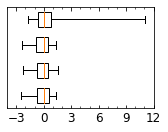

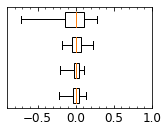

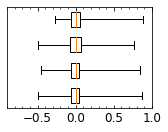

In [70]:
for i, (proj_name, data_list, label_list) in enumerate(zip(proj_names, data_lists, label_lists)):
    if proj_name.startswith('ChileSen'):
        vlim = [-0.9, 1.0];  vstep = 0.5; vstepm = 0.1
    else:
        vlim = [-4.0, 12.0]; vstep = 3.0; vstepm = 1.0

    fig, ax = plt.subplots(figsize=[2.5, 2])
    bplot = ax.boxplot(data_list, vert=False, widths=0.6, whis=(0, 100), patch_artist=True, labels=label_list)
    # fill box with colors
    for patch, c in zip(bplot['boxes'], ['C3', 'C2', 'C1', 'C0']):  patch.set_facecolor('none')

    # axis format
    ax.tick_params(which='both', direction='in', bottom=True, top=True, left=False, right=False)
    #ax.set_xlabel('slant range offset [m]')
    ax.set_xlim(vlim)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(vstep))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(vstepm))
    ax.set_yticklabels([])
    fig.tight_layout()

    # output
    out_fig = os.path.join(work_dir, '{}.pdf'.format(proj_name))
    print('save figure to file', out_fig)
    plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()